<a href="https://colab.research.google.com/github/vilsonrodrigues/PortfolioDataScience/blob/master/Clustering_Youtube_Data_Views_Subscribe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este experimento busca realizar a tentativa de clusterizar dados do youtube sobre inscritos e números de visualização para agrupar por similiaridade

Libs

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

### Pré-Processamento e Visualização dos Dados

Leitura dos dados

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/lucaslattari/MachineLearningSeries/master/Ep%2022/svbr.csv',sep=';')

Tem uma linha que tem valores NaN

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          47 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizações  46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


Apagando linha com valor NaN

In [16]:
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          46 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizações  46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [18]:
sns.set_theme(style="whitegrid")

Vemos que a concentração de views e de incritos da base está concentrada nas quantidades menores, e que temos 3 canais outliers

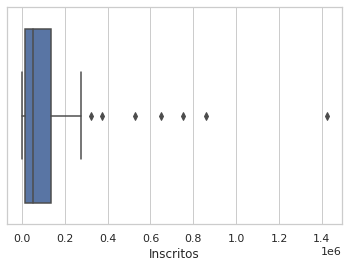

In [19]:
sns.boxplot(x=df['Inscritos'])

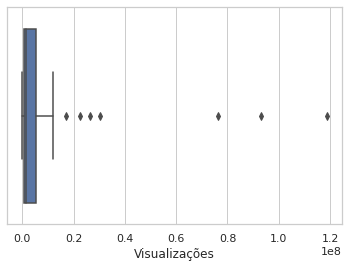

In [20]:
sns.boxplot(x=df['Visualizações'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


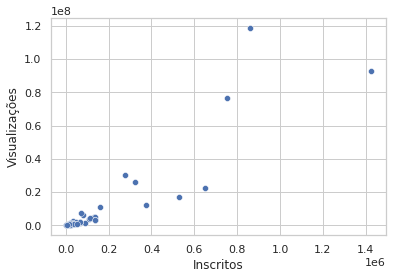

In [21]:
sns.scatterplot(df['Inscritos'],df['Visualizações'])

Retirando os rótulos para depois converter a numpy array

In [22]:
data_np = df.iloc[:,1:].to_numpy()

In [23]:
data_np

array([[1.34380000e+04, 4.06590000e+05],
       [3.52410000e+04, 8.68235000e+05],
       [3.16800000e+04, 2.85650800e+06],
       [2.51000000e+04, 1.50000000e+05],
       [3.27880000e+04, 1.57545600e+06],
       [6.54530000e+04, 1.66789200e+06],
       [1.20000000e+04, 1.71361000e+05],
       [1.61951000e+05, 1.10273860e+07],
       [7.88760000e+04, 6.22623500e+06],
       [2.74196000e+05, 3.01664570e+07],
       [1.31480000e+04, 2.50020000e+05],
       [7.24250000e+04, 7.55149100e+06],
       [7.85800000e+03, 4.36620000e+04],
       [1.10549000e+05, 4.15154800e+06],
       [1.11880000e+04, 5.41832000e+05],
       [5.29900000e+03, 4.43120000e+04],
       [5.60060000e+04, 1.32926800e+06],
       [4.57560000e+04, 1.82572400e+06],
       [1.42305600e+06, 9.30365170e+07],
       [1.29466000e+05, 5.02788000e+06],
       [1.37409000e+05, 5.36342300e+06],
       [1.84040000e+04, 1.42797700e+06],
       [4.20630000e+04, 1.11133400e+06],
       [6.48892000e+05, 2.25551340e+07],
       [1.351180

Semelhante ao crescimentos dos ramos no ` Decision Three `, podemos limitar o crescimento do dendrogram onde cada pai poderá ter um número de filhos a cada nível

Por meio do dendogram e usando o algortimo Ward, pasando a considerar a variância dos conjuntos. Podemos estimar o número de K clusters para o Kmeans. A maior distância entre os conjuntos definirá o número de clusters



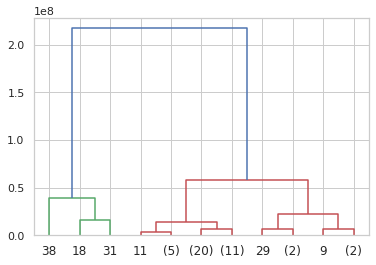

In [24]:
dendrogram(linkage(data_np, 'ward'), truncate_mode = 'level', p = 3)
plt.show()

### Aplicando o algoritmo de clusterização hierárquica 

Definição do modelo, onde o cálculo de distância escolhido foi o euclideano e critério foi o ward

In [25]:
hc_model = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')

Treinando e predizendo cada classe

In [26]:
hc_clusters = hc_model.fit_predict(data_np)

Perceba que, eu não passei o número de clusters que o algoritmo deveria captar, ele usando o `Ward` definiu por si só o número de clusters, que foi justamente o observado no dendrogram feito anteriormente, onde a maior distância vertical entre as ramificações foi de 2 clusters

In [27]:
df['ClusterHierarchy'] = hc_clusters
df

,Canal,Inscritos,Visualizações,ClusterHierarchy
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0
6,Delta T - Os super lentos,12000.0,171361.0,0
7,Bláblálogia,161951.0,11027386.0,0
8,Efarsas,78876.0,6226235.0,0
9,Minuto da Terra,274196.0,30166457.0,0


Número de instâncias em cada cluster

In [28]:
df['ClusterHierarchy'].value_counts()

0    43
1     3
Name: ClusterHierarchy, dtype: int64

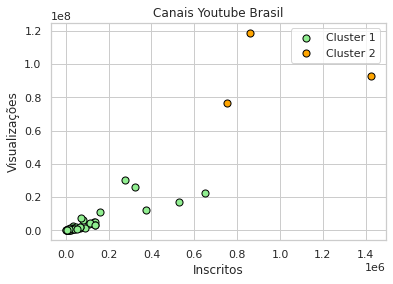

In [30]:
plt.scatter(
    data_np[hc_clusters == 0, 0], data_np[hc_clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    data_np[hc_clusters == 1, 0], data_np[hc_clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='Cluster 2'
)

plt.title("Canais Youtube Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()

### Aplicando o K-Means

Utilizando o método do cotovelo para melhorar a escolha dos centróides, onde ele vai sortear centróides mais disntantes dos já escolhidos

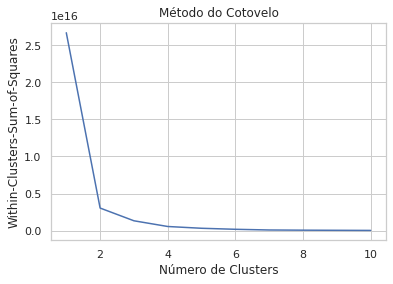

In [31]:
wcss = []
for i in range(1,11):
	kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
	kmeans.fit(data_np)
	wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Within-Clusters-Sum-of-Squares')
plt.show()

A heurística nos indica que o K = 2 será o mais próximo do ideal

Definindo o modelo com K=2 e fazendo a predição

In [32]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)

In [33]:
km_clusters = kmeans.fit_predict(data_np)

Inserindo no DF

In [34]:
df['ClustersKMeans'] = km_clusters
df

,Canal,Inscritos,Visualizações,ClusterHierarchy,ClustersKMeans
0,Site Arqueologia Egípcia,13438.0,406590.0,0,0
1,Terra Negra,35241.0,868235.0,0,0
2,Frank Jaava,31680.0,2856508.0,0,0
3,Dispersciência,25100.0,150000.0,0,0
4,Olá Ciência,32788.0,1575456.0,0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0,0
6,Delta T - Os super lentos,12000.0,171361.0,0,0
7,Bláblálogia,161951.0,11027386.0,0,0
8,Efarsas,78876.0,6226235.0,0,0
9,Minuto da Terra,274196.0,30166457.0,0,0


O KMeans e a clusterização hierárquica chegaram em uma mesma conclusão, então é um bom indício de funcionamento de agrupamento

In [35]:
df['ClustersKMeans'].value_counts()

0    43
1     3
Name: ClustersKMeans, dtype: int64

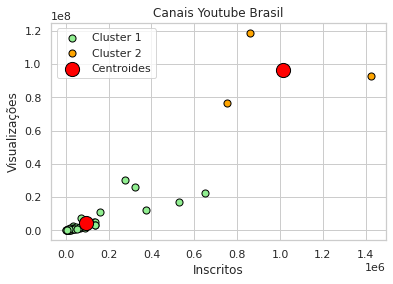

In [37]:
plt.scatter(
    data_np[km_clusters == 0, 0], data_np[km_clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    data_np[km_clusters == 1, 0], data_np[km_clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='Cluster 2'
)

#centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='Centroides'
)
plt.title("Canais Youtube Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()

Com esse experimento podemos acompanhar a eficiência dos algoritmos de clusterização em capturar similiariedades de dados